# Step 2, Surprise Nkuna

In [5]:
# Imports
import numpy as np
import pandas as pd
import yfinance as yf
import datetime
from statsmodels.tsa.stattools import adfuller
from matplotlib import pyplot as plt

[*********************100%%**********************]  1 of 1 completed
                   BTC
Date                  
2022-01-10  161.485992
2022-01-11  165.362000
2022-01-12  165.207001
2022-01-13  161.214005
2022-01-14  162.138000


<Axes: title={'center': 'BTC-USD'}, xlabel='Date'>

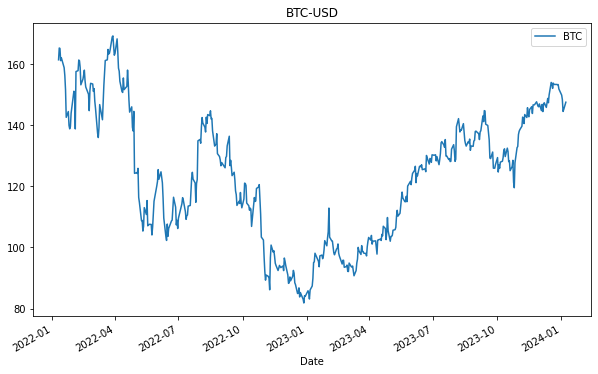

In [6]:
# Dates
end = datetime.datetime.now()
timedelta = datetime.timedelta(2 * 365)
start = end - timedelta
# Download dataset
df = pd.DataFrame(yf.download("AMZN", start, end)["Adj Close"])
df.columns = ["BTC"]
# Plot
df.plot(figsize=(10, 6), title="BTC-USD")

The plot of the time series reveals a mean that is not constant and a variance that fluctuates. To formally assess the stationarity of the series, we employ the Augmented Dickey-Fuller (ADF) test. The ADF test is a statistical method designed to test the following hypotheses:

Null Hypothesis ($H_0$): The time series data contains a unit root, indicating it is <u> not</u> stationary.

Alternative Hypothesis ($H_1$): There is no unit root present in the time series data, suggesting that it is stationary.

In [7]:
# Conduct ADF
adf_test = adfuller(df, maxlag=12)
adf_test
print("ADF Statistic =", adf_test[0])
print("p-value =", adf_test[1])
print("Critical values:", adf_test[4])

ADF Statistic = -2.010294328707746
p-value = 0.2820777158557857
Critical values: {'1%': -3.443496379464, '5%': -2.8673378563200003, '10%': -2.569858036}


Based on the outcomes of the ADF test, it's concluded that our time series is <u>not</u> stationary as the p-value exceeds 0.05 and the absolute value of ADF statistic is **higher** than the 1% critical value of the ADF test.